In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
//To increase height of output window 

<IPython.core.display.Javascript object>

In [47]:
#Read DataFrame
df_11=pd.read_csv("2020_03_11.csv")
df_12=pd.read_csv("2020_03_12.csv")
df_13=pd.read_csv("2020_03_13.csv")

In [48]:
#Renaming the columns
def data_preprocess(df):
    df.rename(columns={'Name of State / UT':'State','Total Confirmed cases (Indian National)':'ConfInd',
           'Total Confirmed cases ( Foreign National )':'ConfFor','Cured':'Rec'}, inplace=True)
    
    df["ConfTot"]=df.ConfInd+df.ConfFor
    df=df.sort_values(by=["ConfTot"], ascending=False).reset_index()
    df.Date=pd.to_datetime(df.Date)
    
    return(df)

In [49]:
def new_case_generator(curr_df, prev_df):
    curr_df["NewConf"]=curr_df.ConfTot-prev_df.ConfTot
    curr_df["NewRec"]=curr_df.Rec-prev_df.Rec
    curr_df["NewDeath"]=curr_df.Death-prev_df.Death
    return curr_df

In [50]:
df_11=data_preprocess(df_11)
df_12=data_preprocess(df_12)
df_13=data_preprocess(df_13)

In [51]:
df_11["NewCase"]=df_11.ConfTot
df_11["NewRec"]=df_11.Rec
df_11["NewDeath"]=df_11.Death
df_12=new_case_generator(df_12,df_11)
df_13=new_case_generator(df_13,df_12)

In [67]:
#Print the status of COVID-19 in India
def report_generator(df):
    conf_t=df.ConfTot.sum()
    conf_tf=df.ConfFor.sum()
    conf_ti=df.ConfInd.sum()
    rec_t=df.Rec.sum()
    death_t=df.Death.sum()
    
    new_conf=df.NewConf.sum()
    new_death=df.NewDeath.sum()
    new_rec=df.NewRec.sum()
    
    print(f"Total Confirmed Cases :{conf_t}\n\tIndian Nationals :{conf_ti}\n\tForeign Nationals :{conf_tf}\
    \nRecovered Cases :{rec_t}\nDeaths Reported :{death_t}\n")
    
    print(f"LAST 24 HOURS\nTotal Confirmed Cases :{new_conf}\nRecovered Cases :{new_rec}\nDeaths Reported :{new_death}")
    
    #New Case Bar
    plt.figure(figsize=(8,6))
    plt.title("New Cases Reported", fontsize=14)
    sns.barplot('State', 'NewConf', data=df[df.NewConf>0])
    plt.yticks(np.arange(0, df.NewConf.max()+1, step=1))
    plt.show()

    #Mapping of data
    lat_ind=20.5937
    lon_ind=78.9629

    ind_map = folium.Map(location=[lat_ind, lon_ind], tiles='cartodbpositron',
               min_zoom=4, max_zoom=6, zoom_start=4)

    for i in range(df.shape[0]):
        folium.CircleMarker([df.Latitude[i], df.Longitude[i]], 
                        radius=3+(15*df.ConfTot[i]/df.ConfTot.max()),
                        color='None',
                        fill_color='red',fill_opacity=0.4,
                        tooltip=f"Region : {df.State[i]}<br>Confirmed Cases : {df.ConfTot[i]}"
                       ).add_to(ind_map)

    ind_map.save("ind_map.html")
    display(ind_map)
    
    #Stacked Bar-Graph Ind vs Foreign
    plt.figure(figsize=(10,6))
    plt.title("Total Patients by State")
    sns.set_style(style="whitegrid")
    sns.barplot(df.State, df.ConfInd, color='red', label="Indian National")
    sns.barplot(df.State, df.ConfFor, color='blue', label="Foreign National",bottom=df.ConfInd)
    plt.legend()
    plt.yticks(np.arange(0, df.ConfTot.max()+1, step=1))
    plt.xticks(rotation=90)
    plt.show()
    
    #Donut plot State wise Split
    x=df.ConfTot
    labels=df.State
    explode=np.zeros(df.shape[0],)
    explode=explode+0.1
    plt.figure(figsize=(8,8))
    plt.title("Patients by State", fontsize=16)
    plt.pie(x, labels=labels, explode=explode,wedgeprops=dict(width=0.5),
            autopct='%1.1f%%', startangle=0, )
    #plt.legend()
    plt.show()

    #Pie chart Indians Vs Foreigners
    x=[conf_ti,conf_tf]
    labels=["Indians","Foreign Nationals"]
    explode=[0.1,0.1]
    plt.figure(figsize=(8,8))
    plt.title("Indians vs Foreigners", fontsize=16)
    plt.pie(x, labels=labels, explode=explode,
            autopct='%1.1f%%')
    plt.legend()
    plt.show()

Total Confirmed Cases :81
	Indian Nationals :64
	Foreign Nationals :17    
Recovered Cases :3
Deaths Reported :1

LAST 24 HOURS
Total Confirmed Cases :7
Recovered Cases :0
Deaths Reported :1


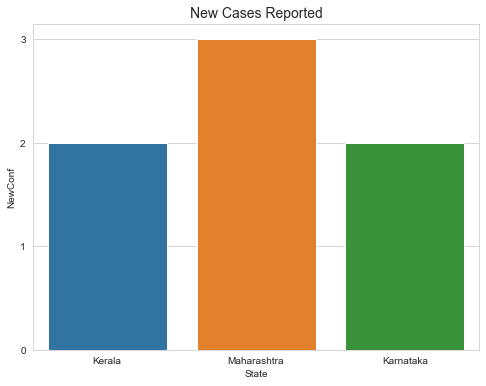

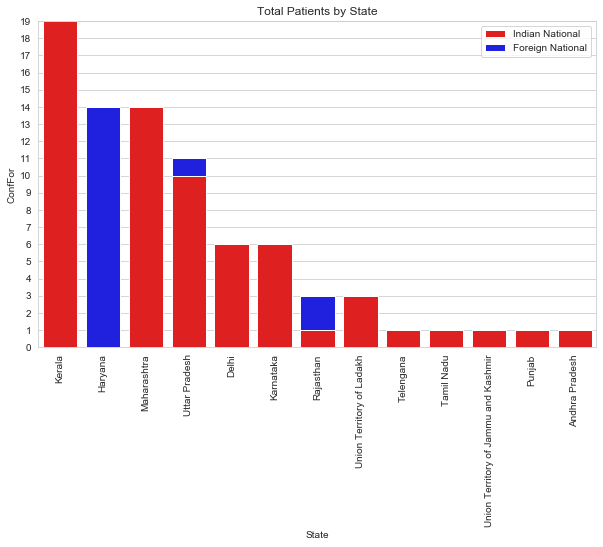

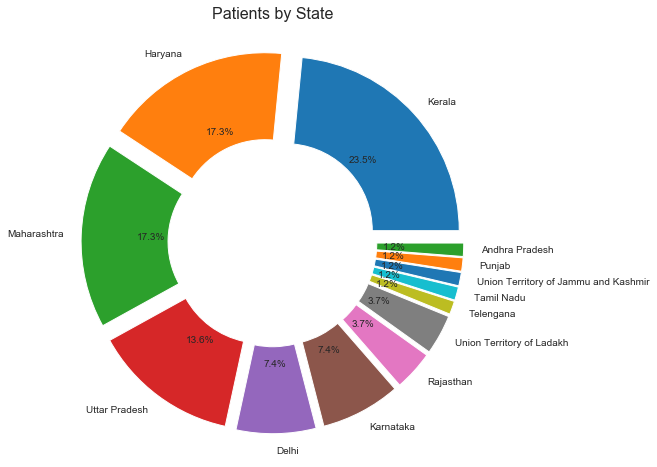

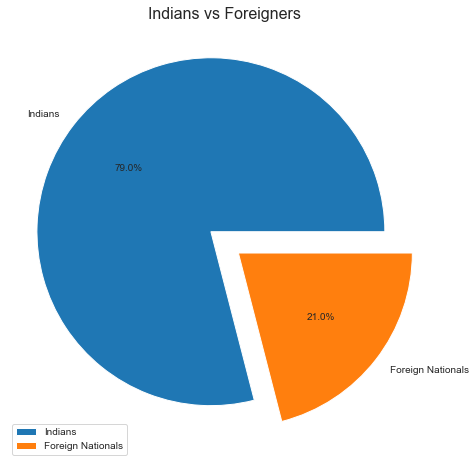

In [68]:
report_generator(df_13)

In [66]:
df_13

,index,State,ConfInd,ConfFor,Rec,Death,Date,Latitude,Longitude,ConfTot,NewConf,NewRec,NewDeath
0,2,Kerala,19,0,3,0,2020-03-13,10.8505,76.2711,19,2,0,0
1,1,Haryana,0,14,0,0,2020-03-13,29.0588,76.0856,14,0,0,0
2,11,Maharashtra,14,0,0,0,2020-03-13,19.7515,75.7139,14,3,0,0
3,5,Uttar Pradesh,10,1,0,0,2020-03-13,26.8467,80.9462,11,0,0,0
4,0,Delhi,6,0,0,0,2020-03-13,28.7041,77.1025,6,0,0,0
5,10,Karnataka,6,0,0,1,2020-03-13,15.3173,75.7139,6,2,0,1
6,3,Rajasthan,1,2,0,0,2020-03-13,27.0238,74.2179,3,0,0,0
7,6,Union Territory of Ladakh,3,0,0,0,2020-03-13,34.2996,78.2932,3,0,0,0
8,4,Telengana,1,0,0,0,2020-03-13,18.1124,79.0193,1,0,0,0
9,7,Tamil Nadu,1,0,0,0,2020-03-13,11.1271,78.6569,1,0,0,0
